In [1]:
# from pathlib import Path
# import sys
# sys.path.append(str(Path().resolve().parent.parent))
import os
os.environ['OMP_NUM_THREADS'] = "1"
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


calculating p_ij
calculating fidelity
elapsed time:5.631708699977025


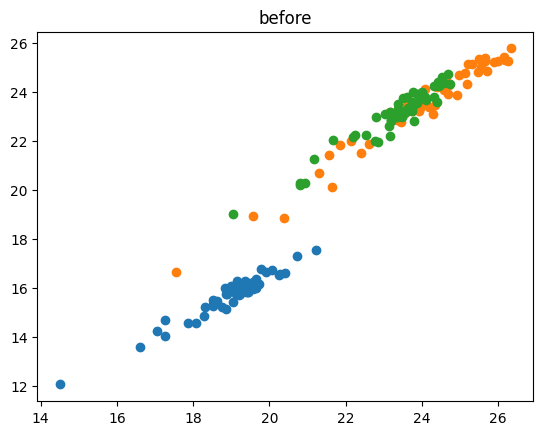

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.5088307028190342
       x: [ 2.833e+00  1.494e+00 ... -2.556e+00  2.398e+00]
    nfev: 1000
   maxcv: 0.0


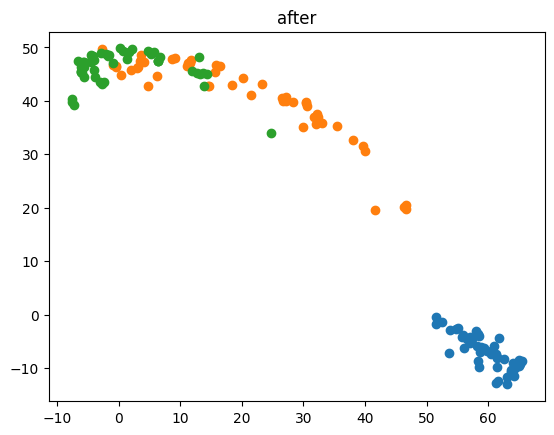

In [2]:
from qnn.new_kernel_tsne import quantum_kernel_tsne
import numpy as np
from quri_parts.circuit import H, CZ
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import MinMaxScaler
from circuit.circuit import LearningCircuit
from numpy.typing import NDArray

def create_quantum_circuit():
    qc = LearningCircuit(n_qubits)

    def preprocess_x(x: NDArray[np.float_], index: int) -> float:
        xa = x[index % len(x)]
        return min(1, max(-1, xa))

    for i in range(n_qubits):
        qc.add_gate(H(i))
    for d in range(depth):
        for i in range(n_qubits):
            qc.add_input_RY_gate(i, lambda x, i=i: preprocess_x(x, i))
        for i in range(n_qubits):
            qc.add_input_RX_gate(i, lambda x, i=i: preprocess_x(x, i))
        if d < depth - 1:
            for i in range(n_qubits):
                qc.add_gate(CZ(i, (i + 1) % n_qubits))
    return qc
X_train, y_train = load_iris(return_X_y=True)
# X_train = X_train / 16.
# X_train = X_train[:200]
# y_train = y_train[:200] #500 => fidelity 81.6[s]
scaler = MinMaxScaler((0, np.pi / 2))
n_qubits = 12
depth = 1

X_train = scaler.fit_transform(X_train)
qk_tsne = quantum_kernel_tsne(max_iter=1000)
qk_tsne.init(create_quantum_circuit, [])
qk_tsne.train(X_train, y_train, method="COBYLA")
